In [2]:
import matplotlib.pyplot as plt 
from IPython.display import Image
import numpy as np

## XOR GATE

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0,1,1,0]]).T
X.shape,Y.shape # 2 features for each data ppint 

((4, 2), (4, 1))

In [9]:
def sig(z):
    return 1 / (1 + np.exp(-z))
def derivativeSig(z):
    return sig(z)*(1-sig(z))

In [11]:
wh = 2 * np.random.random((2,2)) - 1
bh = 2 * np.random.random((1,2)) - 1
wo = 2 * np.random.random((2,1)) - 1
bo = 2 * np.random.random((1,1)) - 1
lr = 0.01

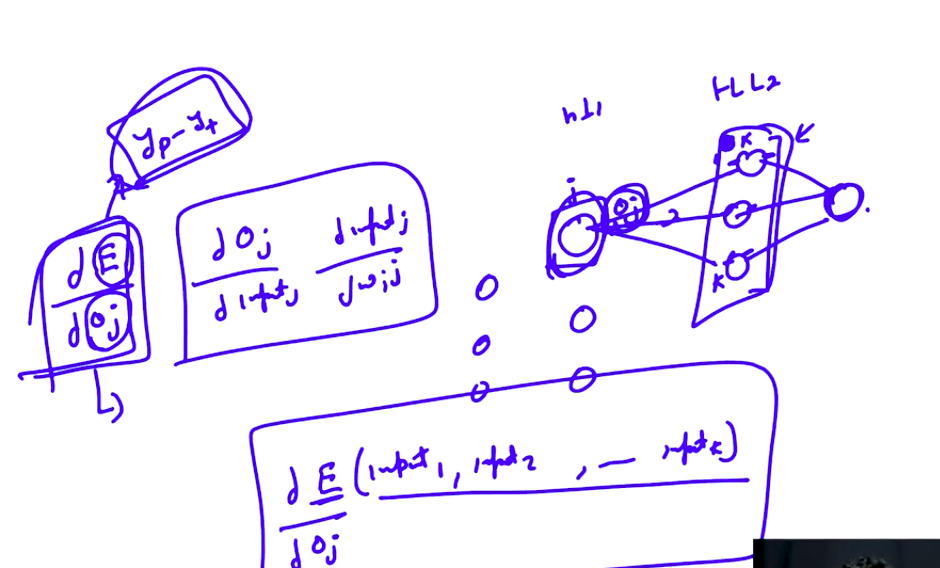

In [13]:
Image(filename='IPythonPictures/hidden2.png',width=500,height=500)

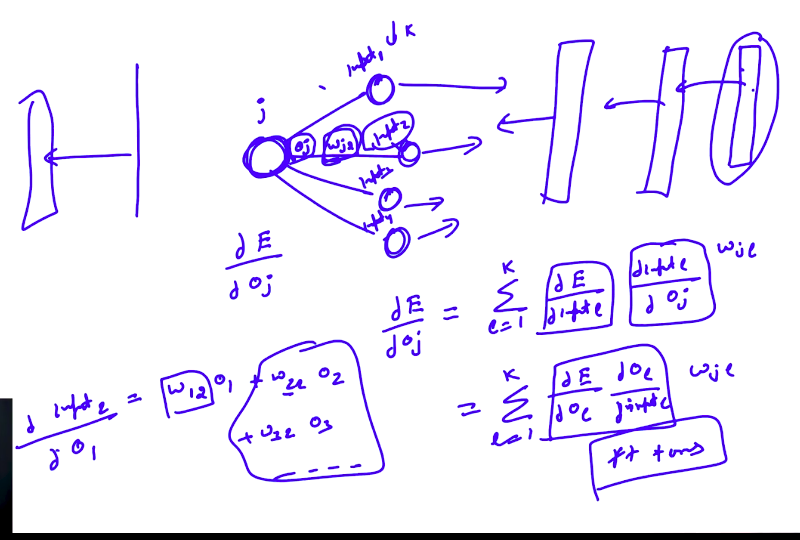

In [14]:
Image(filename='IPythonPictures/hiddenLearning.png',width=500,height=500)

In [12]:
# forward propogation with one hidden layer
for iter in range(100000):
    output0 = X
    inputhidden = np.dot(output0,wh)+bh
    outputhidden = sig(inputhidden)
    inputForOutputLayer = np.dot(outputhidden,wo)+bo
    output = sig(inputForOutputLayer)

    first_term_output_layer = output - Y
    second_term_output_layer = derivativeSig(inputForOutputLayer)
    first_two_output_layer = first_term_output_layer*second_term_output_layer

    first_term_hidden_layer = np.dot(first_two_output_layer,wo.T)
    second_term_hidden_layer = derivativeSig(inputhidden)
    first_two_hidden_layer = first_term_hidden_layer*second_term_hidden_layer

    changes_output = np.dot(outputhidden.T,first_two_output_layer)
    changes_output_bias = np.sum(first_two_output_layer,keepdims=True,axis=0)

    changes_hidden = np.dot(output0.T,first_two_hidden_layer)
    changes_hidden_bias = np.sum(first_two_hidden_layer,keepdims=True,axis=0)

    wo = wo - lr*changes_output
    bo = bo - lr*changes_output_bias

    wh = wh - lr*changes_hidden
    bh = bh - lr*changes_hidden_bias

output0 = X
inputhidden = np.dot(output0,wh) + bh
outputhidden = sig(inputhidden)
inputForOutputLayer = np.dot(outputhidden,wo) + bo
output = sig(inputForOutputLayer)
output,wh,bh,wo,bo

(array([[0.05011374],
        [0.95697997],
        [0.95664419],
        [0.04443115]]), array([[ 5.06085826, -5.35760855],
        [-5.2632209 ,  5.19326212]]), array([[-2.86159698, -2.94797747]]), array([[7.57649319],
        [7.55104559]]), array([[-3.72810634]]))